In [ ]:
import cv2
import os 
from google.colab import files
import glob
from google.colab import drive
path = drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Reading images from the drive and extracting features from them

In [ ]:

path = "/content/drive/MyDrive/45_prints/*"

for file in glob.glob(path):
    def extract_sg_index(img):
    # Preprocess the image to remove noise and crop the footprint
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        footprint = img[y:y+h, x:x+w]
        plt.imshow(footprint) 
    
    # Calculate Sztriter-Godunov index
        navicular_tuberosity = np.argmax(footprint[0,:])
        center_of_heel = np.argmax(footprint[-1,:])
        foot_length = np.linalg.norm(footprint[-1,:] - footprint[0,:])
        sg_index = abs(navicular_tuberosity - center_of_heel) / foot_length
        return sg_index 

# Extract Sztriter-Godunov index for all footprints in the dataset
    sg_indices = []
    for i in range(40):
        img = cv2.imread(file)
        sg_index = extract_sg_index(img)
        sg_indices.append(sg_index)



In [ ]:
cv2.imshow(footprint) 

In [ ]:
import cv2
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def extract_sg_index(img):
    # Preprocess the image to remove noise and crop the footprint
        img = cv2.imread(img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        footprint = img[y:y+h, x:x+w] 
        print(footprint.shape)
        #print(footprint)
        
        plt.imshow(footprint)

    
    # Calculate Sztriter-Godunov index
        navicular_tuberosity = np.argmax(footprint[0,:])
        print(navicular_tuberosity) 
        print(footprint[0,:].shape)
        center_of_heel = np.argmax(footprint[-1,:])
        print(center_of_heel)
        foot_length = np.linalg.norm(footprint[-1,:] - footprint[0,:])
        print(foot_length) 
        sg_index = abs(navicular_tuberosity - center_of_heel) / foot_length
        return sg_index

(2691, 1187, 3)
(2157, 993, 3)
0
(993, 3)
0
8702.565943444497


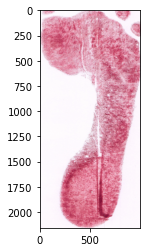

In [ ]:
img = '/content/drive/MyDrive/45_prints/FootPrints (Female)0095.jpg'
sol = extract_sg_index(img) 

In [ ]:
type(img)

str

In [ ]:
feature_list = []
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/45_prints/*"

for file in glob.glob(path):
    def features(img):
    # Preprocess the image to remove noise and crop the footprint
        
    
    # Convert image to binary
        thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)[1]

    # Find contours
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
    # Find contour with the largest area
        largest_contour = max(contours, key=cv2.contourArea)

    # Find bounding box of contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        footprint1 = img[y:y+h, x:x+w]
        print(footprint1.shape)
        # Find arch height
        arch_height = y + h - np.min(largest_contour[:, :, 1])

        # Find arch length
        arch_length = np.max(largest_contour[:, :, 0]) - np.min(largest_contour[:, :, 0])

        # Find foot width
        foot_width = w

        # Calculate arch index
        arch_index = arch_length / foot_width

# Find medial support
        medial_support = np.mean(largest_contour[:, :, 0])
        
        return [arch_height, arch_length, foot_width, arch_index, medial_support]

# Extract Sztriter-Godunov index for all footprints in the dataset
    
      
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    feature = features(img)
    feature_list.append(feature) 

#Final code for features


#Final code for sg index

In [ ]:
sg_indices

#Code to extract features from images

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
path = ("C:/Users/sanni/Downloads/footprints/footprints")
#task_folder = os.path.dirname(experiments_folder)
i=0
feature_list = []
for filename in os.listdir(path):
    filepath = os.path.join(path, filename)
    i+=1
    
    def features(img):
    # Preprocess the image to remove noise and crop the footprint

        #print('original: ',img.shape)
    # Convert image to binary
        blur = cv2.GaussianBlur(img, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour) 

    # Find bounding box of contour

        footprint1 = img[y:y+h, x:x+w]
        print('processed: ',footprint1.shape)
        # Find arch height
        arch_height = y + h - np.min(largest_contour[:, :, 1])

        # Find arch length
        arch_length = np.max(largest_contour[:, :, 0]) - np.min(largest_contour[:, :, 0])

        # Find foot width
        foot_width = w

        # Calculate arch index
        arch_index = arch_length / foot_width

# Find medial support
        medial_support = np.mean(largest_contour[:, :, 0])
        return [arch_height, arch_length, foot_width, arch_index, medial_support]

#     Extract Sztriter-Godunov index for all footprints in the dataset


    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    feature = features(img)
    feature_list.append(feature) 


In [ ]:
fl = np.array(feature_list)

In [ ]:
csv_path = ("C:/Users/sanni/Downloads/features1.csv")
np.savetxt(csv_path, fl,delimiter=",")

In [ ]:
import pandas as pd
import numpy as np

#Feature Loading

In [ ]:
cols = ['arch_height', 'arch_length', 'foot_width', 'arch_index', 'medial_support']
data = pd.read_csv('/content/features1.csv', names = cols)
data

,arch_height,arch_length,foot_width,arch_index,medial_support
0,541.0,858.0,859.0,0.998836,612.835012
1,948.0,864.0,865.0,0.998844,616.607921
2,631.0,963.0,964.0,0.998963,1276.396093
3,1197.0,883.0,884.0,0.998869,1085.060110
4,973.0,896.0,897.0,0.998885,1365.535042
...,...,...,...,...,...
652,543.0,236.0,237.0,0.995781,302.298433
653,227.0,243.0,244.0,0.995902,138.207675
654,238.0,222.0,223.0,0.995516,384.261324
655,277.0,228.0,229.0,0.995633,324.557760


#Label Loading

In [ ]:
target = pd.read_csv('/content/latestlabels.csv', names=['index', 'label'])
target 

,index,label
0,0.71,N
1,0.70,N
2,0.74,N
3,0.61,N
4,0.50,N
...,...,...
652,0.65,N
653,0.15,F
654,0.60,N
655,0.59,N


#Data Preprocessing

In [ ]:
target.label.value_counts()

N       528
F       103
HIGH     26
Name: label, dtype: int64

In [ ]:
labels = np.array(target.label)
X = np.array(data)
labels.shape

(657,)

In [ ]:
label = np.concatenate((labels[[labels == 'F']], labels[[labels == 'N']]))
label.shape

<ipython-input-6-700c23d6e04f>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  label = np.concatenate((labels[[labels == 'F']], labels[[labels == 'N']]))


(631,)

In [ ]:
x = np.concatenate((X[labels == 'F'], X[labels=='N']))

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(x,label)
counter = Counter(y_sm)
counter 

Counter({'F': 528, 'N': 528})

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.15)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(897, 5) (897,)
(159, 5) (159,)


In [ ]:
print(labels.shape)
print(X.shape)

(657,)
(657, 5)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
lr.coef_

array([[-1.37567490e-03, -4.23795931e-02,  4.39410639e-02,
         8.56274681e-02,  9.30824100e-05]])

Train Score : 0.6465997770345596
              precision    recall  f1-score   support

           F       0.68      0.55      0.61       446
           N       0.62      0.75      0.68       451

    accuracy                           0.65       897
   macro avg       0.65      0.65      0.64       897
weighted avg       0.65      0.65      0.64       897



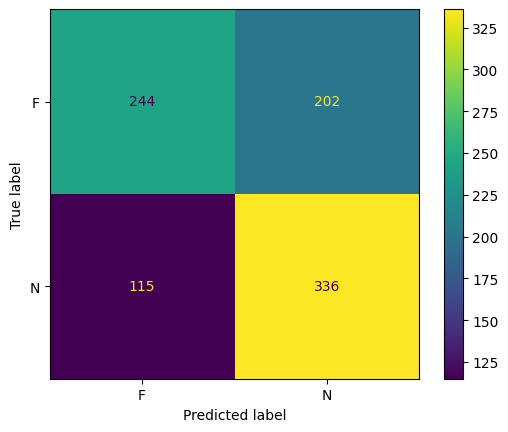

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)
print("Train Score :", lr.score(X_train, y_train))
print(classification_report(y_train, y_hat_train))
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_hat_train, values_format='.5g')

In [ ]:
print("Train Score :", lr.score(X_test, y_test))
print(classification_report(y_test, y_hat_test))

Train Score : 0.6037735849056604
              precision    recall  f1-score   support

           F       0.63      0.56      0.59        82
           N       0.58      0.65      0.61        77

    accuracy                           0.60       159
   macro avg       0.61      0.61      0.60       159
weighted avg       0.61      0.60      0.60       159



#SGDClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_processed = ss.fit_transform(X_sm) 

In [ ]:
X_processed

array([[-0.67756205,  0.59749228,  0.59749228,  0.64035868,  1.09882444],
       [ 0.01319678, -0.1014463 , -0.1014463 ,  0.38138687,  1.0657696 ],
       [ 1.621023  ,  0.81836898,  0.81836898,  0.69606462,  0.44651735],
       ...,
       [ 1.23756761,  0.63835918,  0.63835918,  0.64885853,  0.55569836],
       [-1.09734234, -1.37600428, -1.37600428, -1.45474886, -1.77343034],
       [-0.38057564, -0.33993302, -0.33993302,  0.24490193,  0.39398325]])

In [ ]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_processed,y_sm, test_size=0.3)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(random_state = 42)
sgdc.fit(Xp_train, yp_train)

SGDClassifier(random_state=42)

Training Score 0.6008119079837618
              precision    recall  f1-score   support

           F       0.63      0.51      0.56       375
           N       0.58      0.70      0.63       364

    accuracy                           0.60       739
   macro avg       0.61      0.60      0.60       739
weighted avg       0.61      0.60      0.60       739



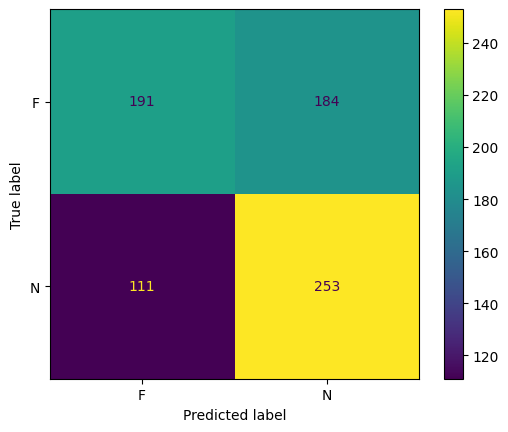

In [ ]:
from sklearn.metrics import classification_report
y_hat_train = sgdc.predict(Xp_train)
y_hat_test = sgdc.predict(Xp_test)
print("Training Score",sgdc.score(Xp_train, yp_train))
print(classification_report(yp_train, y_hat_train))
cm_display = ConfusionMatrixDisplay.from_predictions(yp_train,y_hat_train, values_format='.5g')

In [ ]:
print("Testing Score:",sgdc.score(Xp_test, yp_test))
print(classification_report(yp_test, y_hat_test))

Testing Score: 0.6088328075709779
              precision    recall  f1-score   support

           F       0.61      0.52      0.56       153
           N       0.61      0.69      0.65       164

    accuracy                           0.61       317
   macro avg       0.61      0.61      0.60       317
weighted avg       0.61      0.61      0.61       317



#LogisticRegressionCV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(Cs= range(1,11), penalty='l2')
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=range(1, 11))

In [ ]:
from sklearn.metrics import classification_report
y_hat_train = lrcv.predict(X_train)
y_hat_test = lrcv.predict(X_test)
print(lrcv.score(X_test, y_test))
print(classification_report(y_train, y_hat_train))

0.668769716088328
              precision    recall  f1-score   support

           F       0.66      0.56      0.61       369
           N       0.62      0.72      0.66       370

    accuracy                           0.64       739
   macro avg       0.64      0.64      0.64       739
weighted avg       0.64      0.64      0.64       739



#SVC

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2)

In [ ]:
from sklearn.svm import SVC 
svc = SVC(random_state = 42)
svc.fit(X_train, y_train) 

SVC(random_state=42)

0.6658767772511849
              precision    recall  f1-score   support

           F       0.67      0.55      0.60       412
           N       0.63      0.74      0.68       432

    accuracy                           0.65       844
   macro avg       0.65      0.65      0.64       844
weighted avg       0.65      0.65      0.64       844



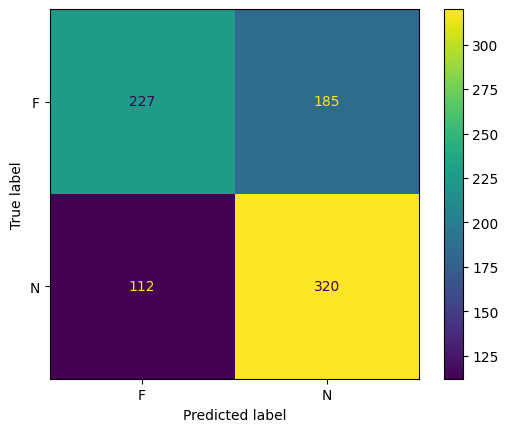

In [ ]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)
print(svc.score(X_train, y_train))
print(classification_report(y_train, y_hat_train))
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_hat_train, values_format='.5g')

In [ ]:
print("Test Score : ",svc.score(X_test, y_test))
print(classification_report(y_test, y_hat_test))

Test Score :  0.6320754716981132
              precision    recall  f1-score   support

           F       0.68      0.54      0.60       116
           N       0.55      0.69      0.61        96

    accuracy                           0.61       212
   macro avg       0.62      0.62      0.61       212
weighted avg       0.62      0.61      0.61       212



# SVC with Preprocessed Data 

In [ ]:
from sklearn.svm import SVC 
svc = SVC(random_state = 42)
svc.fit(Xp_train, yp_train) 

SVC(random_state=42)

In [ ]:
y_hat_train = lr.predict(Xp_train)
y_hat_test = lr.predict(Xp_test)
print(svc.score(X_test, y_test))
print(classification_report(yp_train, y_hat_train))

0.49842271293375395
              precision    recall  f1-score   support

           F       0.43      0.22      0.29       375
           N       0.46      0.70      0.56       364

    accuracy                           0.45       739
   macro avg       0.45      0.46      0.42       739
weighted avg       0.45      0.45      0.42       739



In [ ]:
from sklearn.linear_model import Perceptron
pp = Perceptron(random_state = 42)
pp.fit(X_train, y_train)

Perceptron(random_state=42)

0.5118483412322274
              precision    recall  f1-score   support

           F       0.00      0.00      0.00       412
           N       0.51      1.00      0.68       432

    accuracy                           0.51       844
   macro avg       0.26      0.50      0.34       844
weighted avg       0.26      0.51      0.35       844



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


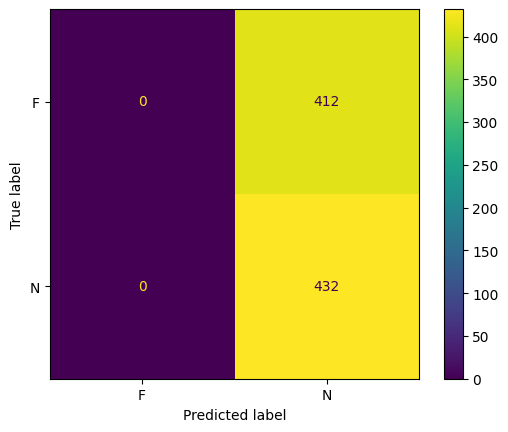

In [ ]:
y_hat_train = pp.predict(X_train)
y_hat_test = pp.predict(X_test)
print(pp.score(X_train, y_train))
print(classification_report(y_train, y_hat_train))
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_hat_train, values_format='.5g')

#NaiveBayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

0.6362559241706162
              precision    recall  f1-score   support

           F       0.65      0.55      0.60       412
           N       0.63      0.72      0.67       432

    accuracy                           0.64       844
   macro avg       0.64      0.63      0.63       844
weighted avg       0.64      0.64      0.63       844



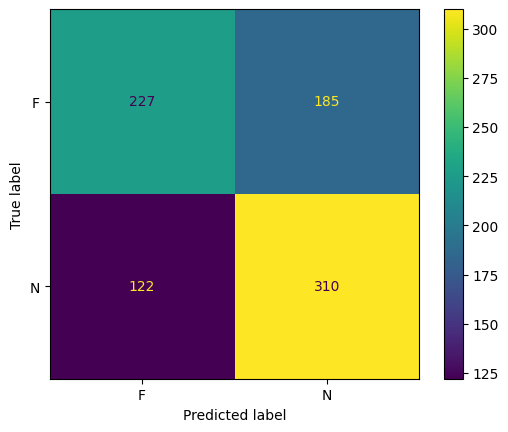

In [ ]:
y_hat_train = nb.predict(X_train)
y_hat_test = nb.predict(X_test)
print(nb.score(X_train, y_train))
print(classification_report(y_train, y_hat_train))
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_hat_train, values_format='.5g')

In [ ]:
print(nb.score(X_test, y_test))
print(classification_report(y_test, y_hat_test))

0.5990566037735849
              precision    recall  f1-score   support

           F       0.67      0.53      0.59       116
           N       0.55      0.69      0.61        96

    accuracy                           0.60       212
   macro avg       0.61      0.61      0.60       212
weighted avg       0.61      0.60      0.60       212



#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42, min_samples_split=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=42)

0.9774881516587678
              precision    recall  f1-score   support

           F       0.97      0.99      0.98       412
           N       0.99      0.97      0.98       432

    accuracy                           0.98       844
   macro avg       0.98      0.98      0.98       844
weighted avg       0.98      0.98      0.98       844



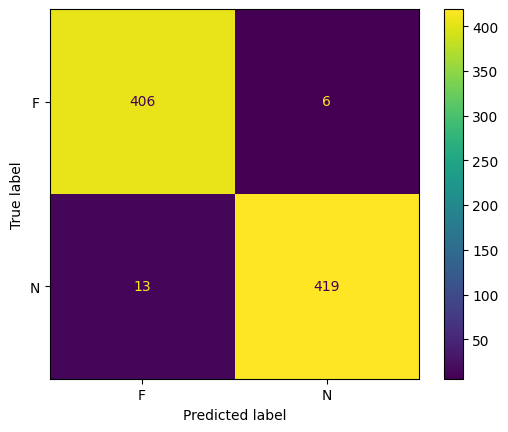

In [ ]:
y_hat_train = dtc.predict(X_train)
y_hat_test = dtc.predict(X_test)
print(dtc.score(X_train, y_train))
print(classification_report(y_train, y_hat_train))
cm_display = ConfusionMatrixDisplay.from_predictions(y_train,y_hat_train, values_format='.5g')

In [ ]:
print(dtc.score(X_test, y_test))
print(classification_report(y_test, y_hat_test))

0.7169811320754716
              precision    recall  f1-score   support

           F       0.74      0.75      0.74       116
           N       0.69      0.68      0.68        96

    accuracy                           0.72       212
   macro avg       0.71      0.71      0.71       212
weighted avg       0.72      0.72      0.72       212



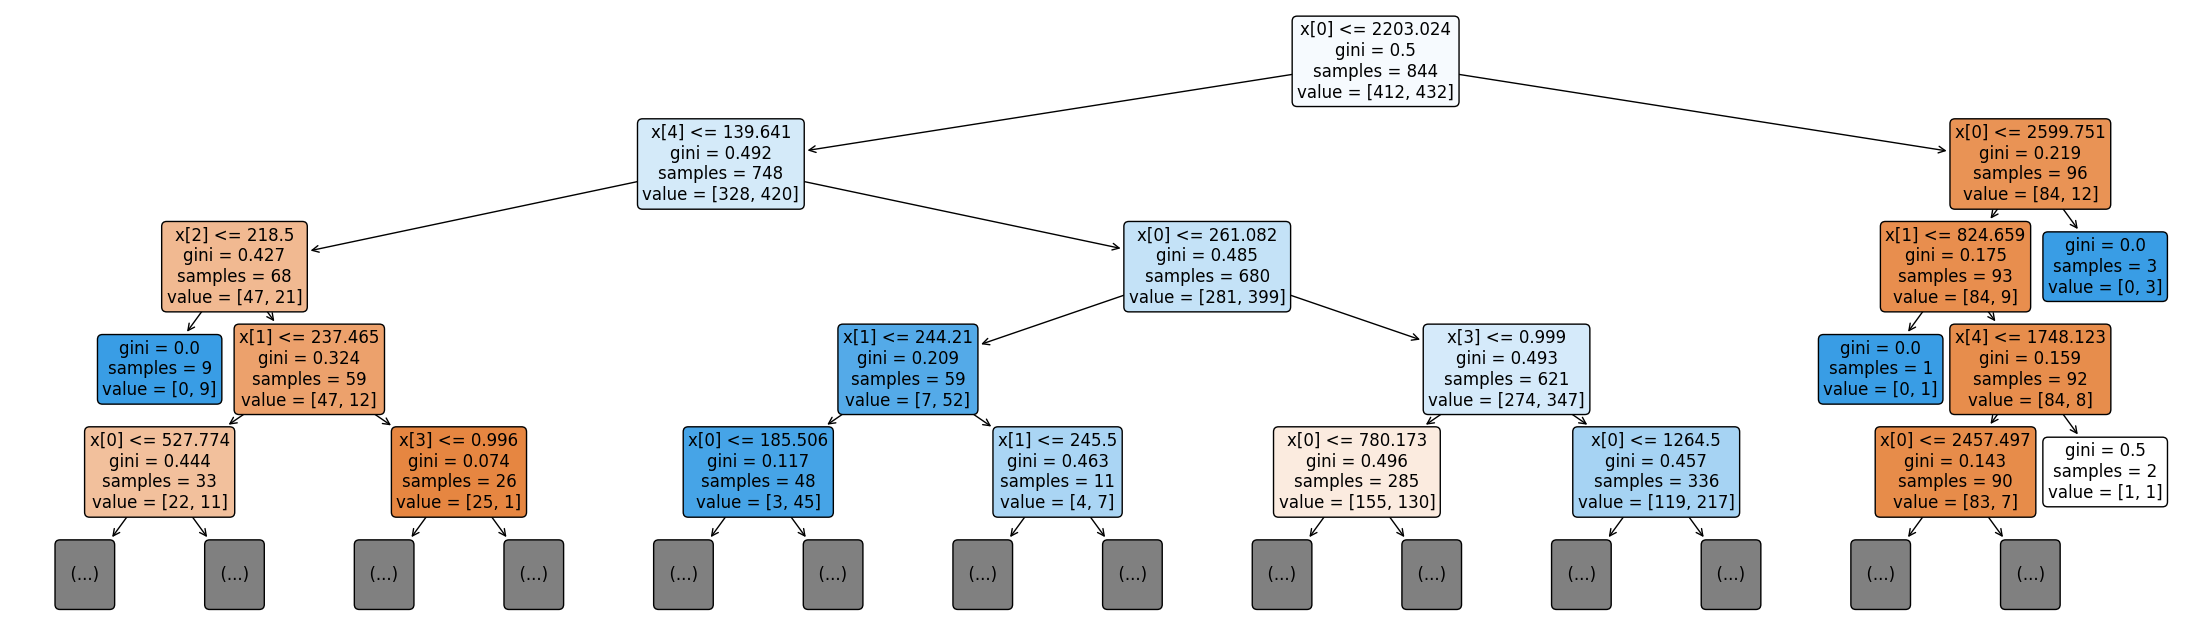

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(28,8), facecolor='w')
# create the tree plot
a = tree.plot_tree(dtc,
                   # use the feature names stored
                   max_depth =4,
                   rounded=True,
                   filled=True,
                   fontsize=12)
# show the plot
plt.show()

#Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50, random_state = 42)
rfc.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=50, random_state=42)

1.0
              precision    recall  f1-score   support

           F       1.00      1.00      1.00       412
           N       1.00      1.00      1.00       432

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844



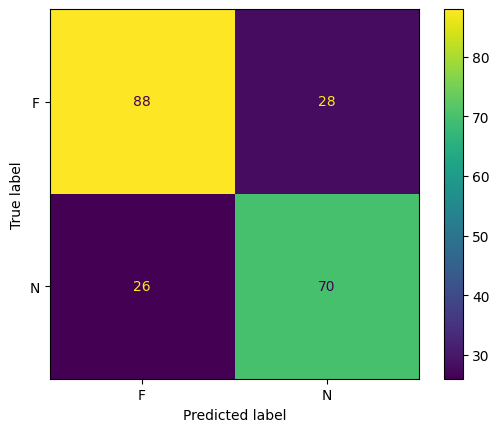

In [ ]:
y_hat_train = rfc.predict(X_train)
y_hat_test = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
print(classification_report(y_train, y_hat_train))

##On Test Data

This is done in another PC as images are not coming in order in drive. 

              precision    recall  f1-score   support

           F       0.77      0.76      0.77       116
           N       0.71      0.73      0.72        96

    accuracy                           0.75       212
   macro avg       0.74      0.74      0.74       212
weighted avg       0.75      0.75      0.75       212



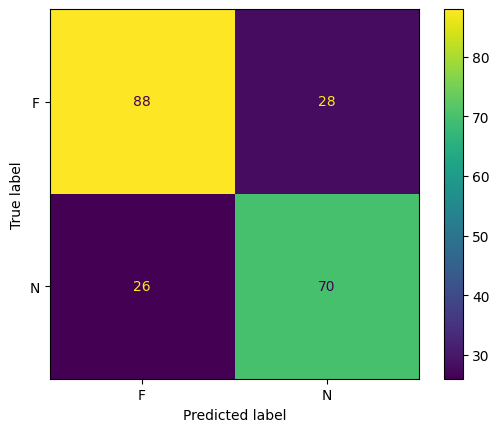

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_test, y_hat_test))
cm_display = ConfusionMatrixDisplay.from_predictions(y_test,y_hat_test, values_format='.5g')

##Appendix

In [ ]:
!unzip footprints.zip